In [124]:
# run command:$ jupyter nbconvert --to notebook --inplace --execute main.ipynb

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from PIL import Image, ImageOps
import numpy as np

# define the scaler
scaler = MinMaxScaler()

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
images = mnist['data']
labels = mnist['target']

# Normalize the data
images_normalized = scaler.fit_transform(images)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_normalized, labels, test_size=0.2, random_state=42)

# Print the shape of the dataset
print("(Number of images, Shape of images)", images.shape)
print("(Number of labels)", labels.shape)


Shape of images: (70000, 784)
Shape of labels: (70000,)


In [125]:
# Define the SVM model
svm_classifier = SVC(kernel='rbf', C=10, gamma='scale')

# train the model
svm_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy of SVM classifier:", accuracy)


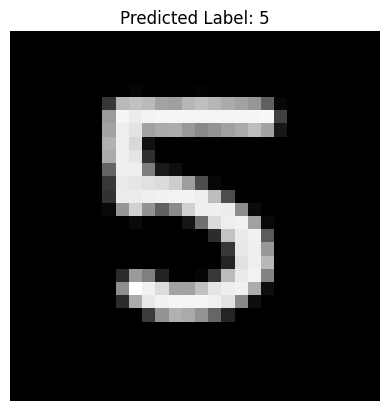

In [117]:
# convert an image I drew to test the model with

# Load your handwritten image
image = Image.open("image.png").convert("L")  # Convert to grayscale

# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Invert the pixel values
image = ImageOps.invert(image)

# Convert the image to a numpy array
image_array = np.array(image)

# Flatten the image array
image_flattened = image_array.flatten()

# Scale the pixel values to the range [0, 1]
# this is equivalent to using the MinMaxScaler()
image_scaled = image_flattened / 255.0

# Predict the label using the trained SVM model
predicted_label = svm_classifier.predict([image_scaled])[0]

# define an image that can be shown to compare to the prediction
image_to_show = image_scaled.reshape(28, 28)

# Display the image along with the true and predicted labels
plt.imshow(image_to_show, cmap='gray')
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()
